In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sample_df = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
print(train_df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

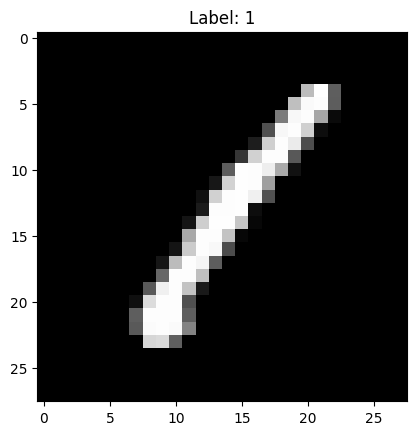

In [3]:
import matplotlib.pyplot as plt
# Visualize an example
image = train_df.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_df.iloc[0, 0]}")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = train_df.iloc[:, 1:].values / 255.0
y = to_categorical(train_df.iloc[:, 0].values, num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8015 - loss: 0.6412 - val_accuracy: 0.9639 - val_loss: 0.1243
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9515 - loss: 0.1655 - val_accuracy: 0.9746 - val_loss: 0.0829
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9675 - loss: 0.1070 - val_accuracy: 0.9817 - val_loss: 0.0615
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9766 - loss: 0.0820 - val_accuracy: 0.9821 - val_loss: 0.0588
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9790 - loss: 0.0705 - val_accuracy: 0.9848 - val_loss: 0.0525
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9832 - loss: 0.0571 - val_accuracy: 0.9854 - val_loss: 0.0458
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9839 - loss: 0.0530 - val_accuracy: 0.9850 - val_loss: 0.0472
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9864 - loss: 0.0436 - 

In [7]:
import numpy as np

test_array = test_df.to_numpy() / 255.0  # Convert to NumPy and normalize
test_array = test_array.reshape(-1, 28, 28, 1)  # Reshape for the model
predictions = model.predict(test_array).argmax(axis=1)  # Get predicted labels

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [8]:
submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)

In [9]:
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
